In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('rate.csv', delimiter='\t', header=0)

In [3]:
ep_per_seasons = list()
for n_ep in df.groupby(df.season).ep.count():
    if len(ep_per_seasons) > 0:
        ep_per_seasons.append(n_ep + ep_per_seasons[-1])
    else:
        ep_per_seasons.append(n_ep)

In [45]:
font_name = {'fontname': 'Source Sans Pro'}
mono_name = {'fontname': 'Source Serif Pro'}
font_size = {'fontsize': 13}
color_label = {'color': '#333333'}

In [119]:
rate_per_season = [df[df.season == i].rate.values for i in range(1,9)]

In [120]:
ep_per_seasons

[10, 20, 30, 40, 50, 60, 67, 71]

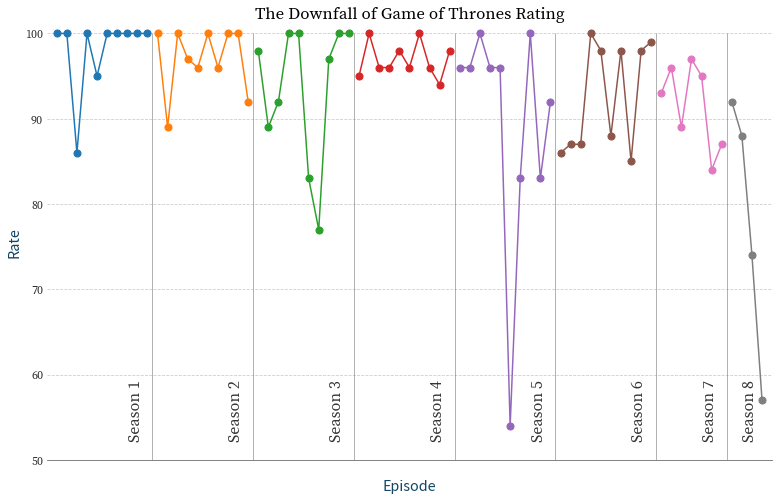

In [180]:
fig, ax = plt.subplots(figsize=(13,8))

y = df.rate.values
x = np.arange(0, len(df.ep.values))

for i, rates in enumerate(rate_per_season):
    x_values = range(ep_per_seasons[i-1] if i > 0 else 0, ep_per_seasons[i])
    patch = ax.scatter(x_values, rates, s=50, zorder=2)
#    patch.set_facecolor('none')
    ax.plot(x_values, rates)
#ax.fill_between(x, 0, y, color='#114665', alpha=.8, zorder=2)

for x_eps in ep_per_seasons[:-1]:
    ax.vlines(x_eps-.5, 40, 100, color='#666666', linewidth=.5, zorder=3)

for i, x_eps in enumerate(ep_per_seasons):
    ax.text(x_eps-2.95, 58, 'Season {}'.format(i+1), {'fontname': 'Source Serif Pro', 'fontsize': 16}, color='#333333', rotation=90)
    
ax.yaxis.grid(color='#cccccc', linestyle='--', zorder=1)

ax.set_title('The Downfall of Game of Thrones Rating', **mono_name, **{'fontsize': 17})
ax.set_xlabel('Episode', color='#114665', **font_name, **{'fontsize': 16}, labelpad=20)
ax.set_ylabel('Rate', color='#114665', **font_name, **{'fontsize': 16})

ax.set_yticklabels(map(str, [50,60,70,80,90,100]), **mono_name, **{'fontsize': 12}, color='#333333')

ax.set_xlim([-1, len(x)])
ax.set_ylim([50, 101])

ax.tick_params(which='both', direction='in', bottom=False, labelbottom=False, left=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#666666')

#fig.savefig('got.png', dpi=200)
fig.savefig('got_tight.png', dpi=200, bbox_inches='tight')